<a href="https://colab.research.google.com/github/IP-Capston-Mosaic/IP-Capston-Mosaic/blob/yejin/handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


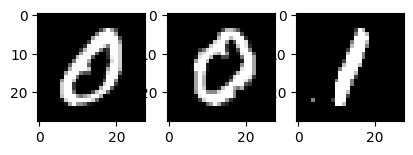

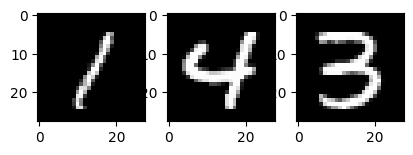

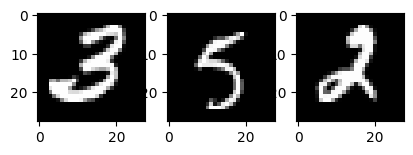

Epoch 1/30
235/235 [==============================] - 294s 1s/step - loss: 0.1287 - acc: 0.9607 - val_loss: 1.9445 - val_acc: 0.3026
Epoch 2/30
235/235 [==============================] - 287s 1s/step - loss: 0.0316 - acc: 0.9901 - val_loss: 0.0792 - val_acc: 0.9759
Epoch 3/30
235/235 [==============================] - 287s 1s/step - loss: 0.0174 - acc: 0.9942 - val_loss: 0.0427 - val_acc: 0.9870
Epoch 4/30
235/235 [==============================] - 286s 1s/step - loss: 0.0122 - acc: 0.9958 - val_loss: 0.0401 - val_acc: 0.9889
Epoch 5/30
235/235 [==============================] - 285s 1s/step - loss: 0.0102 - acc: 0.9965 - val_loss: 0.0385 - val_acc: 0.9898
Epoch 6/30
235/235 [==============================] - 285s 1s/step - loss: 0.0107 - acc: 0.9959 - val_loss: 0.0648 - val_acc: 0.9855
Epoch 7/30
235/235 [==============================] - 286s 1s/step - loss: 0.0116 - acc: 0.9960 - val_loss: 0.0822 - val_acc: 0.9828
Epoch 8/30
235/235 [==============================] - 286s 1s/step - 

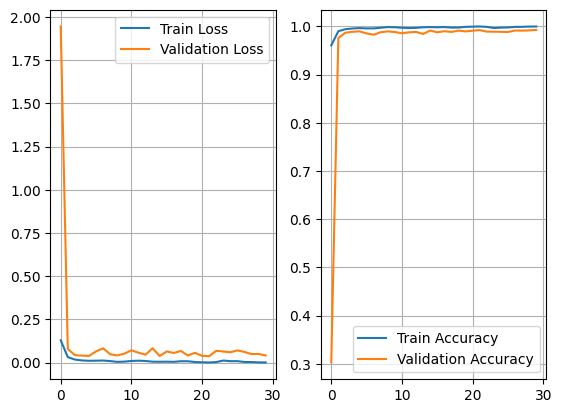

1/1 [==============================] - 0s 419ms/step
Actual : 6	Predict : 6


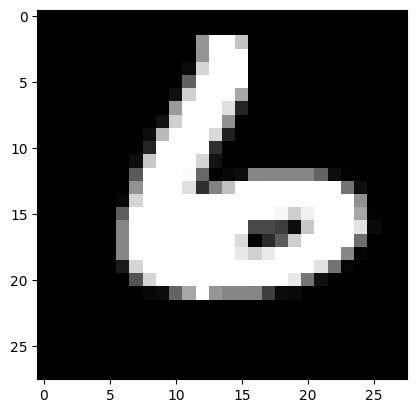

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


import matplotlib.pyplot as plt
import random
for i in range(1,4,1):
    for j in range(1,4,1):
        plt.subplot(i,4,j)
        plt.imshow(x_train[random.randint(0,60000)],cmap="gray")
    plt.show()


from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1,28,28,1)/255.
x_test = x_test.reshape(-1,28,28,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D


model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))


model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics=["acc"])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=256)


loss = history.history["loss"]
acc = history.history["acc"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]
plt.subplot(1,2,1)
plt.plot(range(len(loss)),loss,label = "Train Loss")
plt.plot(range(len(val_loss)),val_loss,label = "Validation Loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(acc)),acc,label = "Train Accuracy")
plt.plot(range(len(val_acc)),val_acc,label = "Validation Accuracy")
plt.grid()
plt.legend()
plt.show()


index =random.randint(0,9999)
plt.imshow(x_test[index],cmap="gray")
predict = model.predict(x_test[index].reshape(1,28,28,1))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)